# PyTorch是什么?
这是一个基于Python的科学计算包，其旨在服务两类场合：

替代numpy发挥GPU潜能
一个提供了高度灵活性和效率的深度学习实验性平台

## Tensors

Tensors和numpy中的ndarrays较为相似, 与此同时Tensor也能够使用GPU来加速运算。

In [6]:
import torch
x = torch.Tensor(5, 3)  # 构造一个未初始化的5*3的矩阵
x = torch.rand(5, 3)  # 构造一个随机初始化的矩阵
y = torch.rand(5, 3)
print(x.size())
print(x,y)

torch.Size([5, 3])
tensor([[0.9721, 0.3847, 0.8446],
        [0.9936, 0.4109, 0.5598],
        [0.2213, 0.2580, 0.0598],
        [0.4842, 0.3331, 0.3240],
        [0.2740, 0.8684, 0.4573]]) tensor([[0.7045, 0.8259, 0.2570],
        [0.1826, 0.6464, 0.7237],
        [0.4746, 0.3752, 0.3427],
        [0.8736, 0.2901, 0.6750],
        [0.0665, 0.6319, 0.8945]])


In [7]:
# 将两个同形矩阵相加有两种语法结构
print(x + y) # 语法一
torch.add(x, y) # 语法二

tensor([[1.6767, 1.2106, 1.1017],
        [1.1762, 1.0574, 1.2835],
        [0.6959, 0.6332, 0.4025],
        [1.3578, 0.6232, 0.9990],
        [0.3405, 1.5003, 1.3518]])


tensor([[1.6767, 1.2106, 1.1017],
        [1.1762, 1.0574, 1.2835],
        [0.6959, 0.6332, 0.4025],
        [1.3578, 0.6232, 0.9990],
        [0.3405, 1.5003, 1.3518]])

In [8]:
# 另外输出tensor也有两种写法
result = torch.Tensor(5, 3) # 语法一
torch.add(x, y, out=result) # 语法二 对输入张量x逐元素加上标量值y，并返回结果到一个新的张量out，即 out=tensor+value
y.add_(x) # 将y与x相加
print(y)

tensor([[1.6767, 1.2106, 1.1017],
        [1.1762, 1.0574, 1.2835],
        [0.6959, 0.6332, 0.4025],
        [1.3578, 0.6232, 0.9990],
        [0.3405, 1.5003, 1.3518]])


tensor操作：https://pytorch.org/docs/stable/torch.html

## numpy转换

In [9]:
# tensor和numpy数据结构的相互转换
a = torch.ones(5)
b = a.numpy()

In [10]:
# 当修改numpy数组之后,与之相关联的tensor也会相应的被修改
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [11]:
# 将numpy的Array转换为torch的Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [12]:
# 另外除了CharTensor之外，所有的tensor都可以在CPU运算和GPU预算之间相互转换
# 使用CUDA函数来将Tensor移动到GPU上
# 当CUDA可用时会进行GPU的运算
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)

tensor([[2.6488, 1.5954, 1.9463],
        [2.1698, 1.4683, 1.8434],
        [0.9171, 0.8912, 0.4623],
        [1.8419, 0.9563, 1.3230],
        [0.6145, 2.3687, 1.8091]], device='cuda:0')


# Pytorch梯度计算、随机梯度下降

使用numpy创建一个y=10*x+4+noise(0,1)的数据，其中x是0到100的范围，以0.01进行等差数列

生成一个包含1000个样本的数据集， 每个样本包含从标准正态分布中采样的2个特征

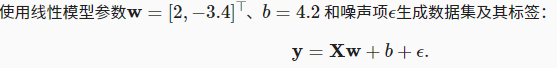

使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

In [20]:
# 创建一个y=10*x+4+noise(0,1)的数据
def synthetic_data1(w, b, start,stop,rate):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.range(start,stop,rate)
    y = X*w + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([10.0])
true_b = 4
features, labels = synthetic_data1(true_w, true_b, 0,100,0.01)
print(features)
print(labels)

tensor([0.0000e+00, 1.0000e-02, 2.0000e-02,  ..., 9.9980e+01, 9.9990e+01,
        1.0000e+02])
tensor([[   4.0010],
        [   4.0893],
        [   4.1939],
        ...,
        [1003.8083],
        [1003.8909],
        [1003.9960]])


C:\mjb/ipykernel_19400/1292990737.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  X = torch.range(start,stop,rate)


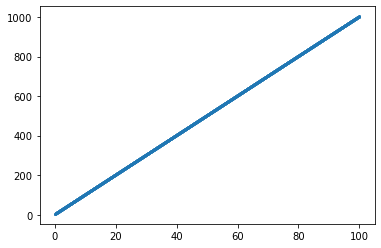

In [23]:
import matplotlib.pyplot as plt
plt.scatter(features.detach().numpy(), labels.detach().numpy(), 1)

In [24]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [29]:
# features中的每一行都包含一个二维数据样本， labels中的每一行都包含一维标签值（一个标量）。
print('features:', features,'\nlabel:', labels)

features: tensor([[ 0.7809, -0.1561],
        [-0.4026,  0.6880],
        [-0.0322,  0.3784],
        ...,
        [ 0.6810, -0.3983],
        [ 0.6442, -0.9558],
        [ 0.0065,  1.3786]]) 
label: tensor([[ 6.3084e+00],
        [ 1.0515e+00],
        [ 2.8526e+00],
        [ 5.9124e-01],
        [ 8.3248e-01],
        [ 1.0455e+01],
        [ 6.8968e-01],
        [ 3.2517e+00],
        [ 4.0957e+00],
        [ 5.9965e+00],
        [ 6.4291e+00],
        [-4.4904e+00],
        [ 4.8309e+00],
        [ 6.0631e+00],
        [ 1.4632e+00],
        [ 5.0281e+00],
        [ 4.3347e+00],
        [ 9.7494e+00],
        [-2.4469e+00],
        [-2.2318e+00],
        [ 4.1696e+00],
        [ 4.9893e+00],
        [ 3.0161e+00],
        [ 5.1675e+00],
        [ 1.0332e+01],
        [ 3.3130e+00],
        [ 8.8926e-01],
        [-4.9719e-01],
        [ 8.7729e+00],
        [ 4.2358e+00],
        [ 6.2840e+00],
        [ 4.6266e+00],
        [ 1.4996e+00],
        [ 8.6719e+00],
        [ 3.9641e+

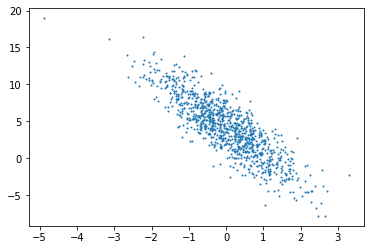

In [31]:
# 通过生成第二个特征features[:, 1]和labels的散点图， 可以直观观察到两者之间的线性关系。
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)

## 读取数据集

训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型。 由于这个过程是训练机器学习算法的基础，所以有必要定义一个函数， 该函数能打乱数据集中的样本并以小批量方式获取数据。

定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。

In [35]:
import random
# 定义一个读取数据集函数
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [36]:
# 读取第一个小批量数据样本并打印。
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4843, -0.3657],
        [ 1.1163, -0.1016],
        [ 0.0831, -1.3951],
        [ 0.4292,  0.4989],
        [ 0.4307,  0.3568],
        [ 0.4349, -0.4433],
        [ 0.3762,  0.3541],
        [ 0.3535, -0.5867],
        [-1.2992, -1.2385],
        [ 0.4748, -0.2301]]) 
 tensor([[4.4713],
        [6.7604],
        [9.1177],
        [3.3700],
        [3.8325],
        [6.5983],
        [3.7362],
        [6.8845],
        [5.7966],
        [5.9248]])


## 初始化模型参数
在我们开始用小批量随机梯度下降优化我们的模型参数之前， 我们需要先有一些参数。 在下面的代码中，我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重， 并将偏置初始化为0。

In [37]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型

In [38]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [39]:
# 定义损失函数
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 优化算法--小批量随机梯度下降
在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。 接下来，朝着减少损失的方向更新我们的参数。 下面的函数实现小批量随机梯度下降更新。 该函数接受模型参数集合、学习速率和批量大小作为输入。每 一步更新的大小由学习速率lr决定。 因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size） 来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [40]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练模型

In [41]:
lr = 0.01
num_epochs = 500
net = linreg
loss = squared_loss
batch_size=32

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 8.867810
epoch 2, loss 4.722002
epoch 3, loss 2.515355
epoch 4, loss 1.340636
epoch 5, loss 0.714888
epoch 6, loss 0.381393
epoch 7, loss 0.203599
epoch 8, loss 0.108729
epoch 9, loss 0.058104
epoch 10, loss 0.031074
epoch 11, loss 0.016636
epoch 12, loss 0.008921
epoch 13, loss 0.004795
epoch 14, loss 0.002589
epoch 15, loss 0.001409
epoch 16, loss 0.000777
epoch 17, loss 0.000439
epoch 18, loss 0.000258
epoch 19, loss 0.000161
epoch 20, loss 0.000109
epoch 21, loss 0.000082
epoch 22, loss 0.000067
epoch 23, loss 0.000059
epoch 24, loss 0.000054
epoch 25, loss 0.000052
epoch 26, loss 0.000051
epoch 27, loss 0.000050
epoch 28, loss 0.000050
epoch 29, loss 0.000050
epoch 30, loss 0.000049
epoch 31, loss 0.000049
epoch 32, loss 0.000049
epoch 33, loss 0.000049
epoch 34, loss 0.000049
epoch 35, loss 0.000049
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000049
epoch 39, loss 0.000049
epoch 40, loss 0.000049
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e

epoch 336, loss 0.000049
epoch 337, loss 0.000049
epoch 338, loss 0.000049
epoch 339, loss 0.000049
epoch 340, loss 0.000049
epoch 341, loss 0.000049
epoch 342, loss 0.000049
epoch 343, loss 0.000049
epoch 344, loss 0.000049
epoch 345, loss 0.000049
epoch 346, loss 0.000049
epoch 347, loss 0.000049
epoch 348, loss 0.000049
epoch 349, loss 0.000049
epoch 350, loss 0.000049
epoch 351, loss 0.000049
epoch 352, loss 0.000049
epoch 353, loss 0.000049
epoch 354, loss 0.000049
epoch 355, loss 0.000049
epoch 356, loss 0.000049
epoch 357, loss 0.000049
epoch 358, loss 0.000049
epoch 359, loss 0.000049
epoch 360, loss 0.000049
epoch 361, loss 0.000049
epoch 362, loss 0.000049
epoch 363, loss 0.000049
epoch 364, loss 0.000049
epoch 365, loss 0.000049
epoch 366, loss 0.000049
epoch 367, loss 0.000049
epoch 368, loss 0.000049
epoch 369, loss 0.000049
epoch 370, loss 0.000049
epoch 371, loss 0.000049
epoch 372, loss 0.000049
epoch 373, loss 0.000049
epoch 374, loss 0.000049
epoch 375, loss 0.000049


In [42]:
print(w,b)

tensor([[ 2.0005],
        [-3.4002]], requires_grad=True) tensor([4.2000], requires_grad=True)


# 简洁实现

In [44]:
import numpy as np
import torch
from torch.utils import data
from torch import nn

In [45]:
# 调用框架中现有的API来读取数据。将features和labels作为API的参数传递，并通过数据迭代器指定batch_size。 
# 此外，布尔值is_train表示是否希望数据迭代器对象在每个迭代周期内打乱数据。
# 读取数据集
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [46]:
# 定义模型
net = nn.Sequential(nn.Linear(2, 1))
# 初始化模型参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
# 定义损失函数
loss = nn.MSELoss()
# 定义优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [47]:
# 训练模型
num_epochs = 500
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.576098
epoch 2, loss 0.010241
epoch 3, loss 0.000272
epoch 4, loss 0.000102
epoch 5, loss 0.000099
epoch 6, loss 0.000099
epoch 7, loss 0.000099
epoch 8, loss 0.000099
epoch 9, loss 0.000099
epoch 10, loss 0.000099
epoch 11, loss 0.000099
epoch 12, loss 0.000099
epoch 13, loss 0.000099
epoch 14, loss 0.000099
epoch 15, loss 0.000099
epoch 16, loss 0.000099
epoch 17, loss 0.000099
epoch 18, loss 0.000099
epoch 19, loss 0.000099
epoch 20, loss 0.000099
epoch 21, loss 0.000099
epoch 22, loss 0.000099
epoch 23, loss 0.000099
epoch 24, loss 0.000099
epoch 25, loss 0.000099
epoch 26, loss 0.000099
epoch 27, loss 0.000099
epoch 28, loss 0.000099
epoch 29, loss 0.000099
epoch 30, loss 0.000099
epoch 31, loss 0.000099
epoch 32, loss 0.000099
epoch 33, loss 0.000099
epoch 34, loss 0.000099
epoch 35, loss 0.000099
epoch 36, loss 0.000099
epoch 37, loss 0.000099
epoch 38, loss 0.000099
epoch 39, loss 0.000099
epoch 40, loss 0.000099
epoch 41, loss 0.000099
epoch 42, loss 0.000099
e

epoch 334, loss 0.000099
epoch 335, loss 0.000099
epoch 336, loss 0.000099
epoch 337, loss 0.000099
epoch 338, loss 0.000099
epoch 339, loss 0.000099
epoch 340, loss 0.000099
epoch 341, loss 0.000099
epoch 342, loss 0.000099
epoch 343, loss 0.000099
epoch 344, loss 0.000099
epoch 345, loss 0.000099
epoch 346, loss 0.000099
epoch 347, loss 0.000099
epoch 348, loss 0.000099
epoch 349, loss 0.000099
epoch 350, loss 0.000099
epoch 351, loss 0.000099
epoch 352, loss 0.000099
epoch 353, loss 0.000099
epoch 354, loss 0.000099
epoch 355, loss 0.000099
epoch 356, loss 0.000099
epoch 357, loss 0.000099
epoch 358, loss 0.000099
epoch 359, loss 0.000099
epoch 360, loss 0.000099
epoch 361, loss 0.000099
epoch 362, loss 0.000099
epoch 363, loss 0.000099
epoch 364, loss 0.000099
epoch 365, loss 0.000099
epoch 366, loss 0.000099
epoch 367, loss 0.000099
epoch 368, loss 0.000099
epoch 369, loss 0.000099
epoch 370, loss 0.000099
epoch 371, loss 0.000099
epoch 372, loss 0.000099
epoch 373, loss 0.000099


In [48]:
print(net[0].weight)
print(net[0].bias)

Parameter containing:
tensor([[ 2.0007, -3.4003]], requires_grad=True)
Parameter containing:
tensor([4.2001], requires_grad=True)
